In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

Pictures for SHAP.

In [7]:
# load shap data
features = ['afdc', 'sex', 'married', 'pbhous', 'hsorged', 'black', 'hispanic', 'wkless13','age', 'prevearn']

cf_SHAP = pd.read_csv("cf_SHAP_values.csv", index_col=0)
cf_iv_SHAP = pd.read_csv("cf_iv_SHAP_values.csv", index_col = 0)
df = pd.read_csv("final_df.csv")
df_features = df[features]

In [5]:
# read SHAP interactions data
cf_SHAP_int = np.load("cf_SHAP_interactions.npy")
cf_iv_SHAP_int = np.load("cf_iv_SHAP_interactions.npy")

### SHAP global importance plot

In [10]:
def abs_mean(array):
    return np.mean(np.abs(array))


glob_imp = cf_iv_SHAP.apply(abs_mean, axis=0).sort_values(ascending=False)
glob_imp

prevearn    4.910346e+08
age         4.297629e+08
sex         2.431272e+08
wkless13    1.900843e+08
married     1.605059e+08
hsorged     1.565045e+08
black       1.080198e+08
afdc        6.855871e+07
pbhous      5.878080e+07
hispanic    2.769956e+07
dtype: float64

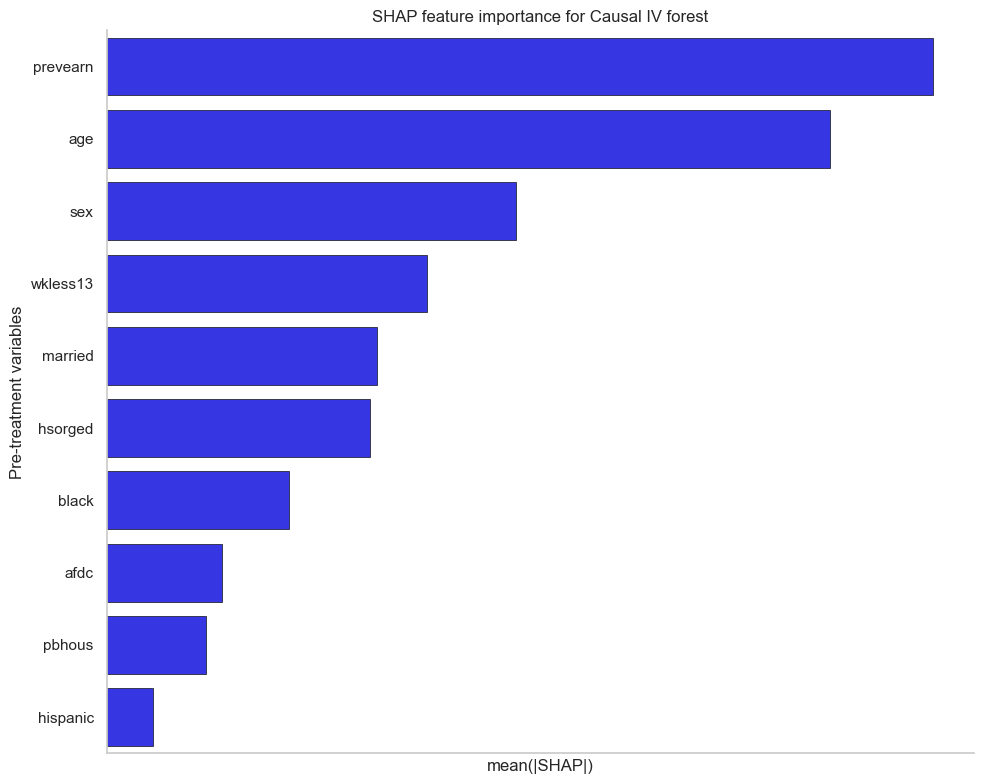

In [21]:
# create seaborn barplot
plt.figure(figsize=(10,8))
sns.barplot(x=glob_imp, y=glob_imp.index, color="blue", alpha = 0.9, orient="h", linewidth=0.5, edgecolor="black")
plt.title("SHAP feature importance for Causal IV forest")
plt.xlabel("mean(|SHAP|)")
plt.ylabel("Pre-treatment variables")

# hide x-axis ticks
plt.xticks([])
sns.despine()
plt.tight_layout()

# save plot
plt.savefig("cf_iv_SHAP_feature_importance.pdf", format  = "pdf", dpi = 400)

plt.show()